In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [2]:
pwd = os.getcwd()

In [3]:
source1 = cv.imread(r'D:/1. Active Projects/Data Analysis/Github Repository/Find_Objects_Image_Templating_Open_CV\Find_Hidden_Objects_OpenCV_Image_Template/source_images/source_1/source1_scene.png', 0)
source1_object = cv.imread(r'D:/1. Active Projects/Data Analysis/Github Repository/Find_Objects_Image_Templating_Open_CV\Find_Hidden_Objects_OpenCV_Image_Template/source_images/source_1/source1_object.png', 0)
source1_copy = source1.copy()
w, h = source1_object.shape[::-1]

In [4]:
cv.imshow('Scene',source1)
cv.waitKey(0)
cv.destroyAllWindows()

In [31]:
cv.imshow('OBJECT',source1_object)
cv.waitKey(0)
cv.destroyAllWindows()

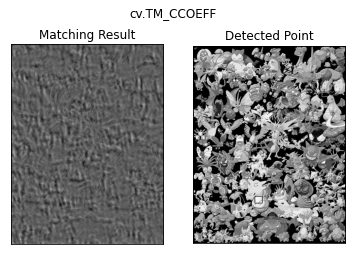

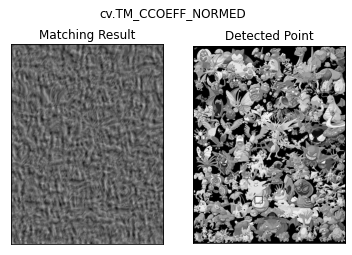

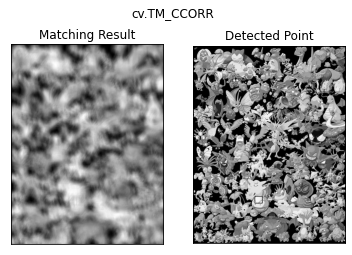

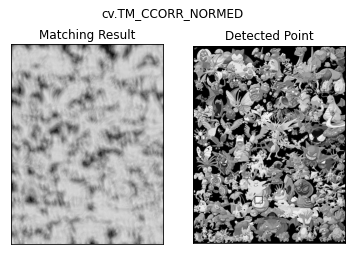

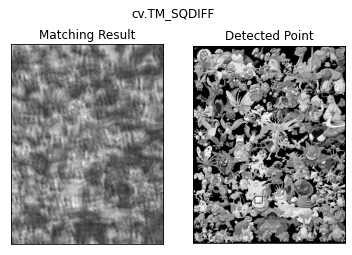

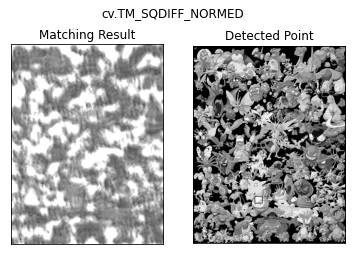

In [11]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    source1_copy = source1_copy.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(source1, source1_object, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(source1,top_left, bottom_right, 225, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(source1,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [18]:
tmmatch = cv.matchTemplate(source1, source1_object, cv.TM_CCOEFF)

In [19]:
cv.imshow('Result', tmmatch)
cv.waitKey()
cv.destroyAllWindows()

In [6]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(tmmatch)

In [7]:
max_loc

(60, 546)

In [8]:
max_val

112161432.0

In [10]:
w = source1.shape[1]
h = source1_object.shape[0]

In [11]:
cv.rectangle(source1, max_loc, (max_loc[0] + w, max_loc[1] + h), (0,255,255), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
threshold = .60

In [13]:
yloc, xloc = np.where(tmmatch >= threshold)


In [14]:
len(xloc)

762762

In [15]:
for (x, y) in zip(xloc, yloc):
    cv.rectangle(source1, (x, y), (x + w, y + h), (0,255,255), 2)

In [67]:
cv.imshow('ketemu', source1)
cv.waitKey()
cv.destroyAllWindows()